> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [no show appointments may-2016.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not 
patients show up for their appointment. A number of characteristics about the patient are included in each row:
>
>      ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
     ● ‘Neighborhood’ indicates the location of the hospital.
     ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
     ● Hipertension	Diabetes Alcoholism	indicate whether the patients has those disease or not 
     ● the last column ’no-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’  if they did not show up.
     
>
all these  factors are important for us to know in order to predict if a patient will show up for their scheduled appointment



In [18]:
# import statements for all of the packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **In this section**:  i will load in the csv file, check for cleanliness, and then trim and clean my dataset for analysis. then i will document my data cleaning steps in mark-down cells precisely and justify my cleaning decisions.
>

### General Properties

In [19]:
# Load  data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
#the shape of the data 
df.shape

(110527, 14)

In [21]:
#check if there is a duplicate rows 
sum(df.duplicated())

0

In [22]:
# check if any patient have the same Appointment Day
df.duplicated(["PatientId","AppointmentDay"]).sum()

8719

In [23]:
df.isnull().sum().sum()

0

In [26]:
#number of patients that did't show up
df.duplicated(["PatientId","No-show"]).sum()

38710

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110526 non-null  float64
 11  Handcap         110523 non-null  float64
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 11.8+ MB


In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110526.000000,110525.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161544,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
#the patients with the age = -1 
wrong_age=df.query("Age== -1 ")
wrong_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0.0,0.0,0,No


### Data Cleaning (correcting names and removing unwanted data !)

In [40]:
#removing the wrong age rows
df.drop(index=99832, inplace=True)

In [41]:
#removing the duplicated patients that has the same appointmentDay
df.drop_duplicates(["PatientId","AppointmentDay"],inplace=True)
df.shape

(101807, 14)

In [42]:
#removing the duplicated patients that the same show up attribute 
df.drop_duplicates(["PatientId","No-show"], inplace=True)
df.shape

(71077, 14)

In [44]:
#removing the unwanted columns from the data 
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [45]:
#correcting the column names
df.rename(columns={"Hipertension":"Hypertension","No-show":"No_Show"}, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [46]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,71077.000000,71077.000000,71077.000000,71077.000000,71077.000000,71077.000000,71077.000000
mean,36.532915,0.095615,0.194958,0.070951,0.024874,0.020161,0.337001
std,23.378213,0.294064,0.396171,0.256745,0.155743,0.155476,0.472688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> Now after i've trimmed and cleaned my data, i'm ready to move on to exploration. **Compute statistics and create visualizations** with the goal of addressing the research questions that i posed in the Introduction section. 
>


### First look at the data information

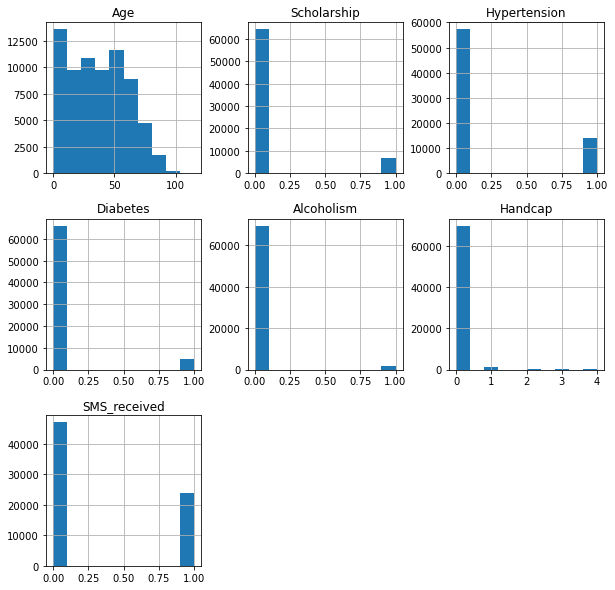

In [47]:
df.hist(figsize=(10,10));

In [48]:
#divide the pations into 2 groups: show and not_show  
attend = df["No_Show"]=="No"
absent = df["No_Show"]=="Yes"
df[attend].count(),df[absent].count()

(Gender           53878
 Age              53878
 Neighbourhood    53878
 Scholarship      53878
 Hypertension     53878
 Diabetes         53878
 Alcoholism       53878
 Handcap          53878
 SMS_received     53878
 No_Show          53878
 dtype: int64,
 Gender           17199
 Age              17199
 Neighbourhood    17199
 Scholarship      17199
 Hypertension     17199
 Diabetes         17199
 Alcoholism       17199
 Handcap          17199
 SMS_received     17199
 No_Show          17199
 dtype: int64)

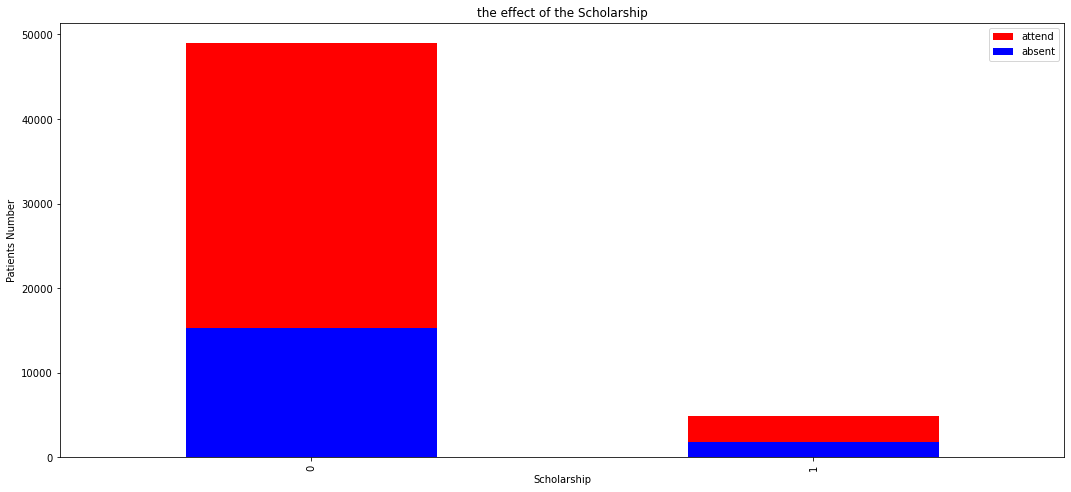

In [49]:
# the effect of Scholarship on the attendance
plt.figure(figsize=[18,8])
df.Scholarship[attend].value_counts().plot(kind='bar',color='red',label='attend')
df.Scholarship[absent].value_counts().plot(kind='bar',color='blue' ,label='absent')
plt.legend();
plt.title('the effect of the Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Patients Number');

In [50]:
df.Scholarship[attend].value_counts(), df.Scholarship[absent].value_counts()

(0    48953
 1     4925
 Name: Scholarship, dtype: int64,
 0    15328
 1     1871
 Name: Scholarship, dtype: int64)

there are 64281 patients do not have a Scholarship but there are 6796 do  

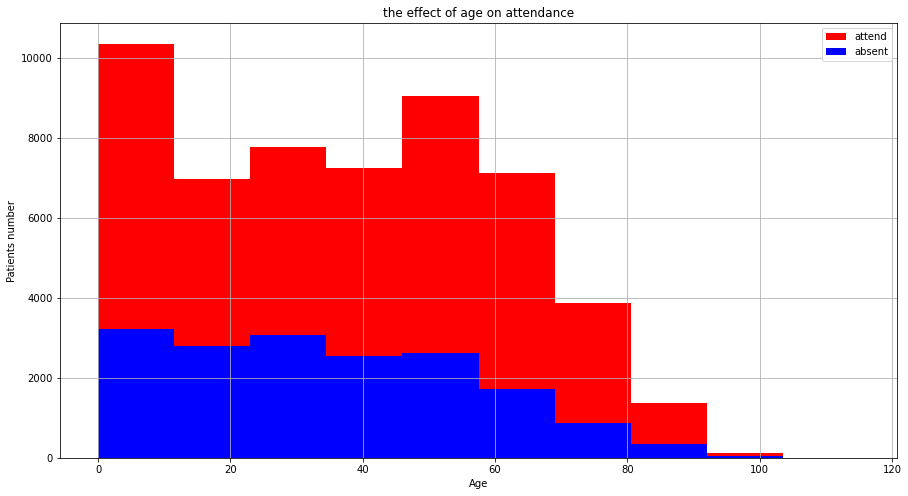

In [51]:
# the effect of age on attendance
plt.figure(figsize=[15,8])
df[attend].Age.hist(alpha=1, bins=10, color='red', label='attend')
df[absent].Age.hist(alpha=1,bins=10,color='blue',label='absent')
plt.legend();
plt.title( 'the effect of age on attendance')
plt.xlabel('Age')
plt.ylabel('Patients number');

the ages between 0:8 and 50:55 ate more likely to attend than others

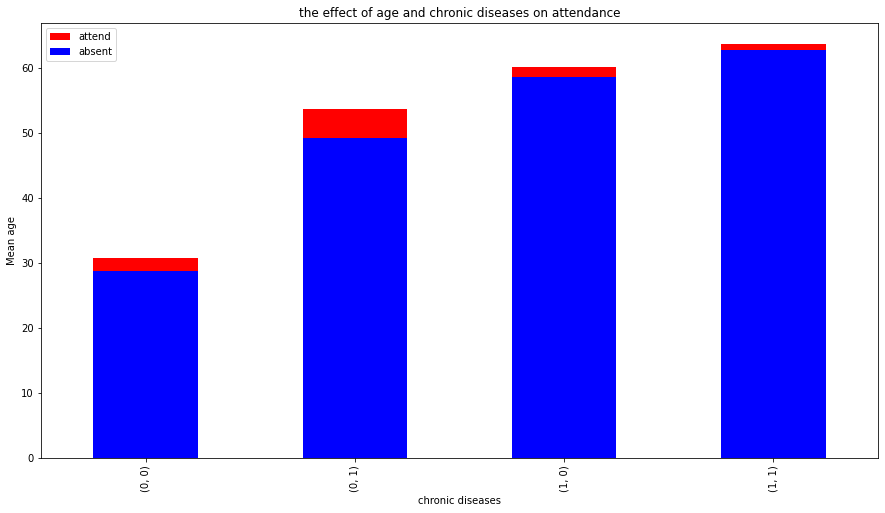

In [52]:
# the effect of both age and chronic diseases on the attendence 
plt.figure(figsize=[15,8])
df[attend].groupby(['Hypertension','Diabetes']).Age.mean().plot(kind='bar', color="red",label="attend")
df[absent].groupby(['Hypertension','Diabetes']).Age.mean().plot(kind='bar', color='blue',label="absent")
plt.legend();
plt.title('the effect of age and chronic diseases on attendance')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');


In [53]:
df[attend].groupby(['Hypertension', 'Diabetes']).mean()['Age'],df[absent].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.725552
               1           53.755862
 1             0           60.258737
               1           63.770287
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.749199
               1           49.227074
 1             0           58.698335
               1           62.839548
 Name: Age, dtype: float64)

from the numbers shown that there is a correlation between age and chronic diseases but thers is no correlation between chronic diseases and attending


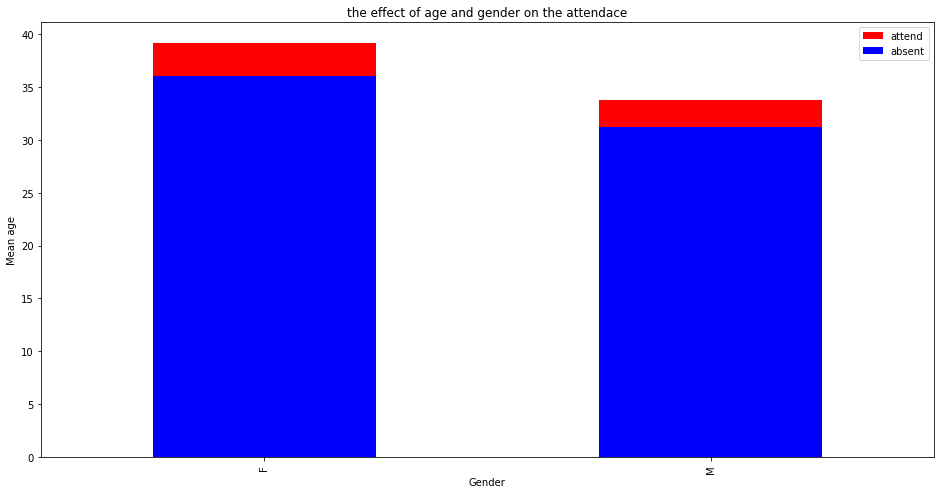

In [54]:
# the effect of  age and gender on the attendence ?
plt.figure(figsize=[16,8]) 
df[attend].groupby('Gender').Age.mean().plot(kind='bar', color='red',label='attend')
df[absent].groupby('Gender').Age.mean().plot(kind='bar', color='blue',label="absent")
plt.legend();
plt.title( 'the effect of age and gender on the attendace')
plt.xlabel('Gender')
plt.ylabel( 'Mean age');

In [27]:
df[attend].groupby('Gender').Age.mean(), df[absent].groupby('Gender').Age.mean()

(Gender
 F    39.146012
 M    33.756911
 Name: Age, dtype: float64, Gender
 F    36.023848
 M    31.176079
 Name: Age, dtype: float64)

the numbers of the males and females  are nearly the same 

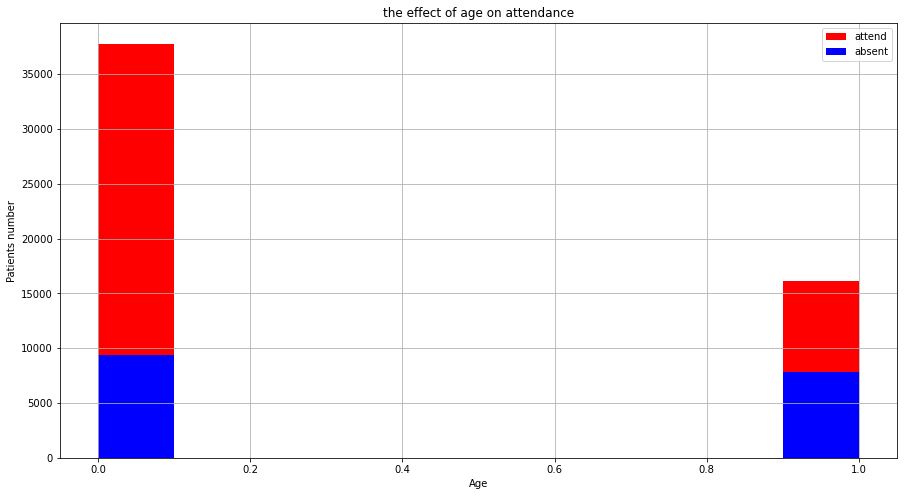

In [64]:
# the effect of receiving SMS on the attendence
plt.figure(figsize=[15,8])
df[attend].SMS_received.hist(alpha=1, bins=10, color='red', label='attend')
df[absent].SMS_received.hist(alpha=1,bins=10,color='blue',label='absent')
plt.legend();
plt.title( 'the effect of age on attendance')
plt.xlabel('Age')
plt.ylabel('Patients number');

In [65]:
df.SMS_received.value_counts()

0    47124
1    23953
Name: SMS_received, dtype: int64

Number of Patients that did not receive sms is greater than patients that received sms

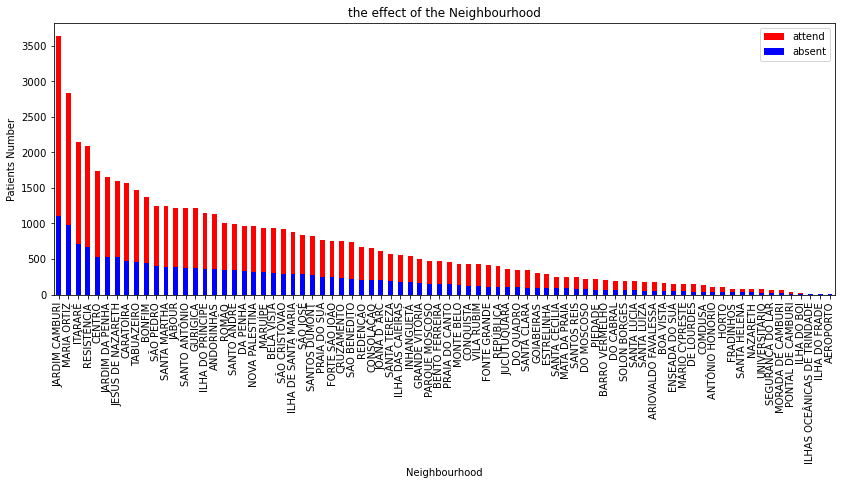

In [66]:
# the effect of neighbourhood on the attendance
plt.figure(figsize=[14,5])
df.Neighbourhood[attend].value_counts().plot(kind='bar',color='red',label='attend')
df.Neighbourhood[absent].value_counts().plot(kind='bar',color='blue' ,label='absent')
plt.legend();
plt.title('the effect of the Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

the Neighbourhoods have an affect on showing up where ***JARDIM CAMBURI*** has the greatest number of patients and also has the greatest showing rate

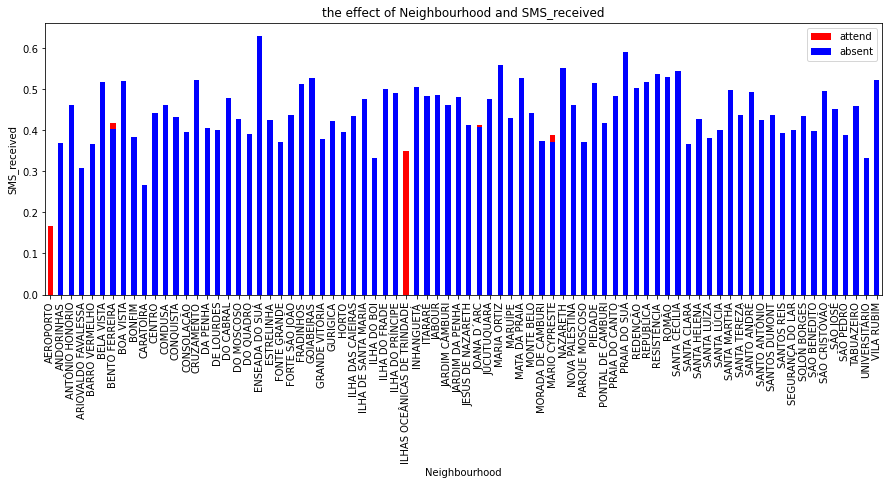

In [67]:
#the effect of Neighbourhood and SMS_received on attendace
plt.figure(figsize=[15, 5])
df[attend].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color = 'red', label = 'attend')
df[absent].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color = 'blue', label = 'absent')
plt.legend()
plt.title("the effect of Neighbourhood and SMS_received")
plt.xlabel("Neighbourhood")
plt.ylabel("SMS_received");

<a id='conclusions'></a>
## Conclusions

**the important factors to predict if a patient will show up for their scheduled appointment**
  

>  Age has a clear effect on the showing rate where Ages from 0:8 are the most showing(must be parents taking care of their kids) then from 50:55 comes next then  the least attending are patients whom above 65 years old.


>  Number of showing patients winthout receiving sms is greater than showing parients with receiving sms besides there are some Neighbourhoods that did not receivce sms , which means that we need to check our sms compaign


>  the Neighbourhoods have an affect on showing up where ***JARDIM CAMBURI*** has the greatest number of patients and also has the greatest showing rate


## limitions

>there is no clear Correlation between gender, chronic diseases and Scholarship


In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1